## Data Mining Assignment 4
### Author G. Gordon
February 15, 2016

Part 3 - Product 11743201

## DATA ANALYSIS

In [1]:
dir()

[1] "Assignment 4-11740941-Copy2.ipynb"       
 [2] "Assignment 4-11740941.ipynb"             
 [3] "Assignment 4-11741274.ipynb"             
 [4] "Assignment 4-11743201.ipynb"             
 [5] "Assignment 4-11743201-wip2.ipynb"        
 [6] "Assignment 4.ipynb"                      
 [7] "last_n_days_time_series.py"              
 [8] "product-11740941-7-day-forecast-data.csv"
 [9] "product-11740941-daily-quantities.csv"   
[10] "product-11740941.zip"                    
[11] "product-11741274-7-day-forecast-data.csv"
[12] "product-11741274-daily-quantities.csv"   
[13] "product-11741274.zip"                    
[14] "product-11743201-7-day-forecast-data.csv"
[15] "product-11743201-daily-quantities.csv"   
[16] "product-11743201.zip"                    
[17] "timeseriesHistory.r"                     
[18] "top product queries"

In [2]:
# Import the data for prod 11740941
prod1.data = read.csv('product-11743201-7-day-forecast-data.csv',header=F)
head(prod1.data)

V1  V2  V3  V4  V5  V6  V7  V8
1 354 306 282 261 264 220 195 241
2 306 282 261 264 220 195 241 284
3 282 261 264 220 195 241 284 275
4 261 264 220 195 241 284 275 232
5 264 220 195 241 284 275 232 326
6 220 195 241 284 275 232 326 173

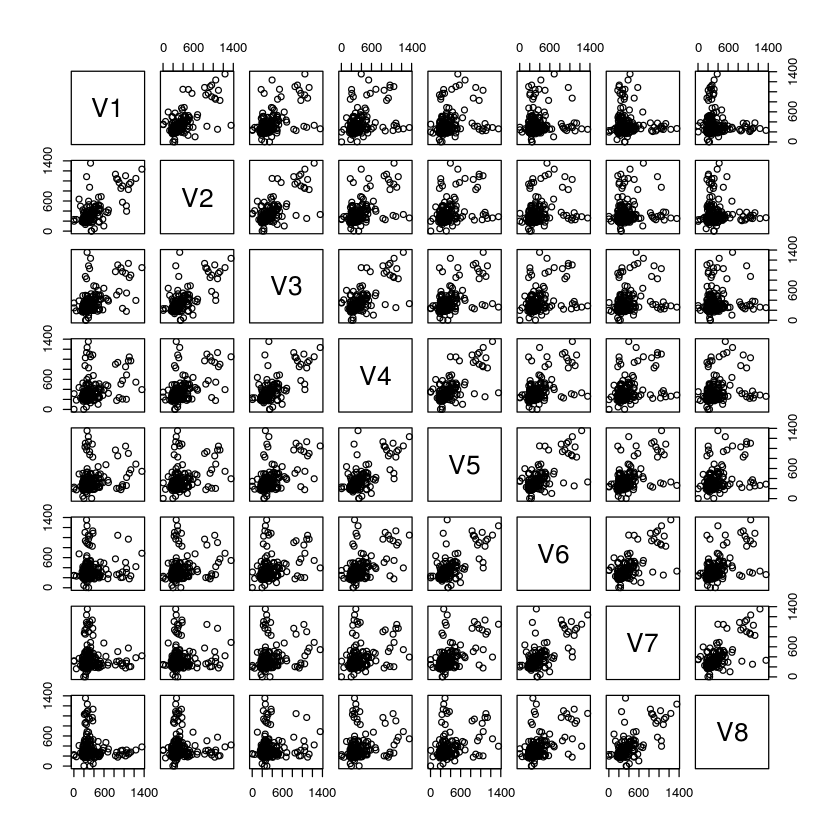

In [3]:
plot(prod1.data)

In [4]:
prod1.days = 1:nrow(prod1.data)

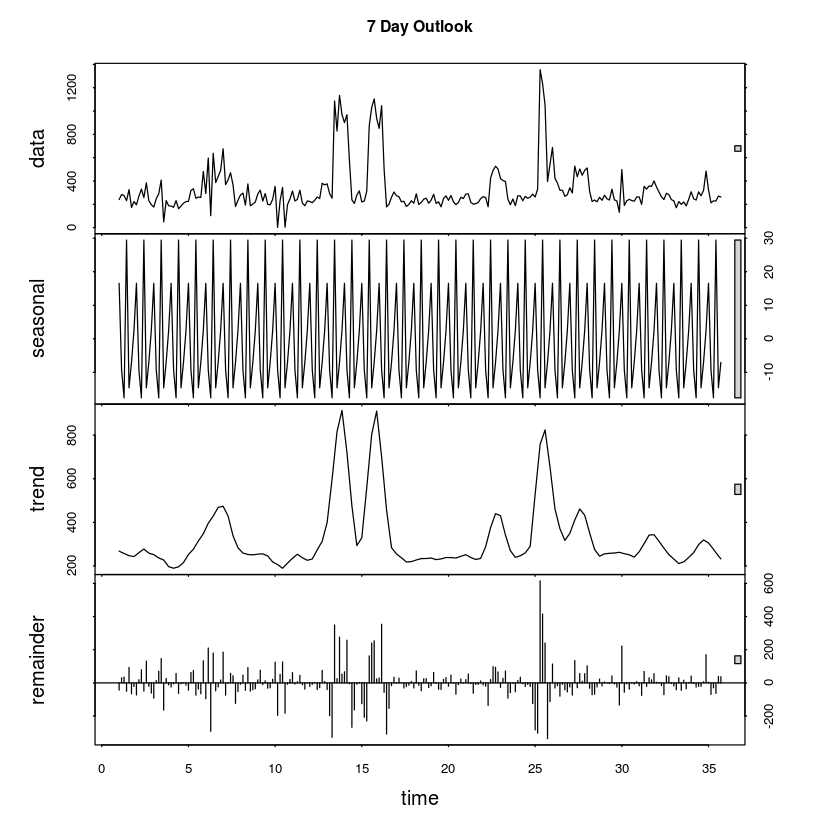

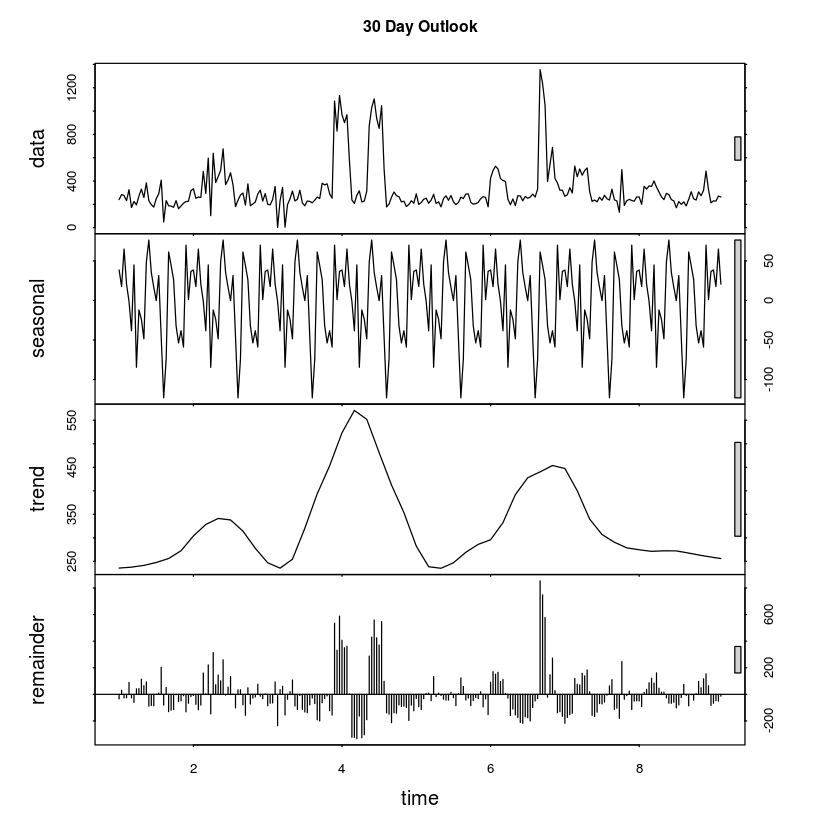

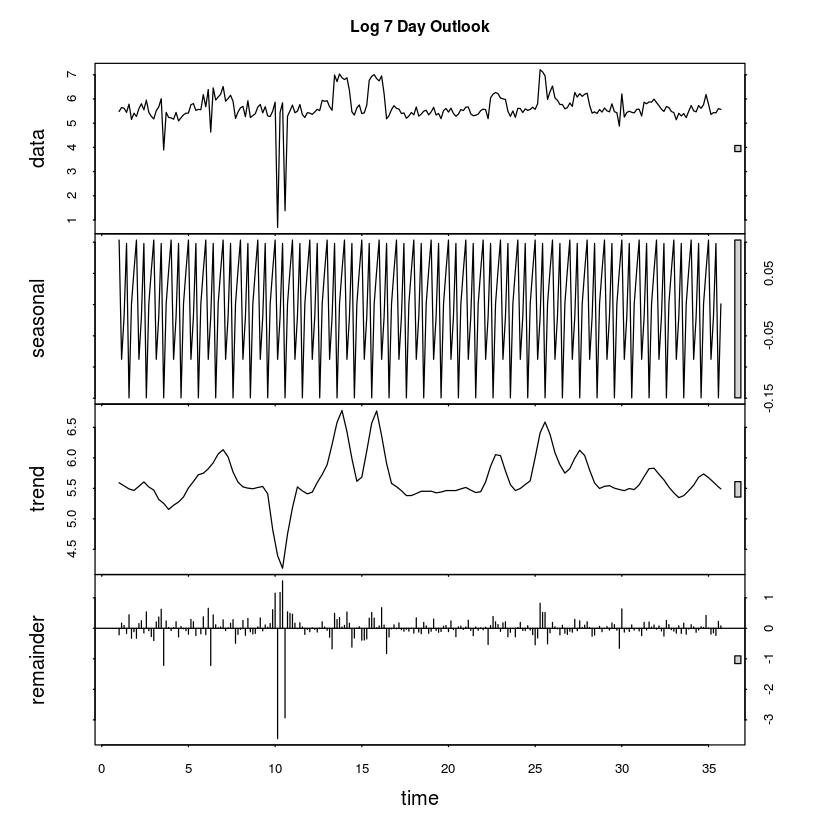

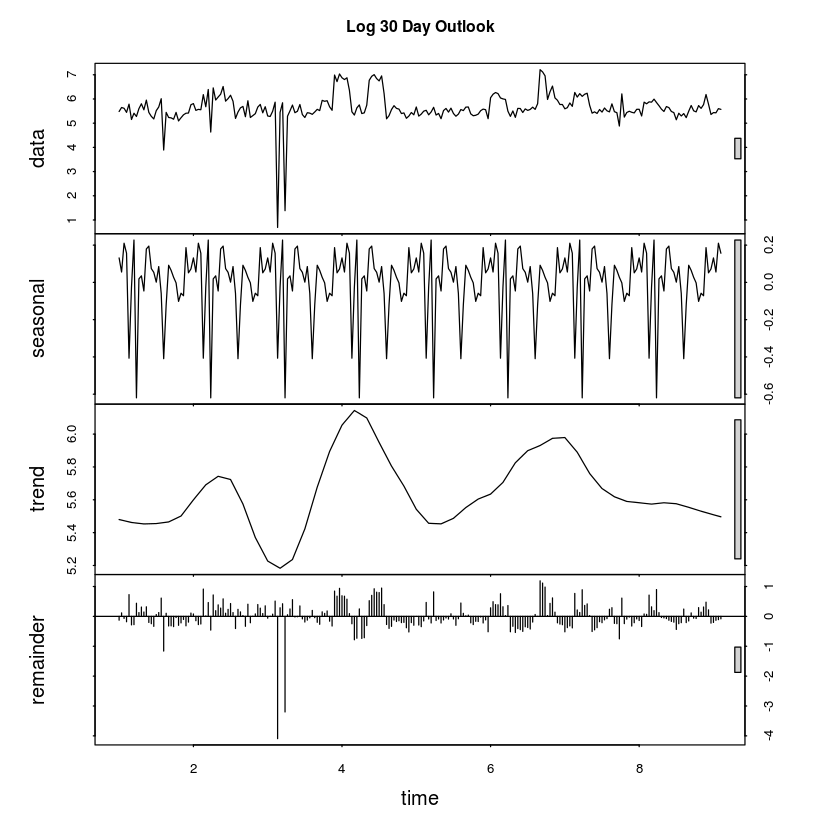

In [5]:
prod1.ts7 = ts(prod1.data,start = 1,freq=7)
prod1.ts30 = ts(prod1.data,start = 1,freq=30)
plot(stl(prod1.ts7[,8],s.window='periodic'),main="7 Day Outlook")
plot(stl(prod1.ts30[,8],s.window='periodic'),main="30 Day Outlook")
plot(stl(log(prod1.ts7[,8]),s.window='periodic'),main="Log 7 Day Outlook")
plot(stl(log(prod1.ts30[,8]),s.window='periodic'),main="Log 30 Day Outlook")

In [6]:
# Split data into 80/20 Train/Test
set.seed(23)
no_of_observations = nrow(prod1.data)
percent_split = 0.8
sampler = sample(1:no_of_observations,size = as.integer(percent_split * no_of_observations))
#Normalize Columns Using Max
prod1.data.normalized = prod1.data
for(i in 1:ncol(prod1.data)){
    prod1.data.normalized[,i] = prod1.data[,i] /max(prod1.data[,i]) 
}

prod1.data.train = prod1.data.normalized[sampler,]

prod1.data.test = prod1.data.normalized[-sampler,]

paste("Train Size: ",nrow(prod1.data.train),"| Test size: ", nrow(prod1.data.test)," | Total:",no_of_observations)


[1] "Train Size:  195 | Test size:  49  | Total: 244"

### Regression Model


Call:
lm(formula = V8 ~ ., data = prod1.data.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29267 -0.03471 -0.00064  0.03370  0.40052 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.06784    0.01591   4.265 3.17e-05 ***
V1           0.04705    0.06066   0.776   0.4389    
V2          -0.15430    0.06614  -2.333   0.0207 *  
V3          -0.02570    0.07063  -0.364   0.7164    
V4           0.15931    0.07568   2.105   0.0366 *  
V5          -0.17690    0.07195  -2.459   0.0149 *  
V6           0.13979    0.07363   1.898   0.0592 .  
V7           0.71668    0.06383  11.227  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08805 on 187 degrees of freedom
Multiple R-squared:  0.657,	Adjusted R-squared:  0.6441 
F-statistic: 51.16 on 7 and 187 DF,  p-value: < 2.2e-16


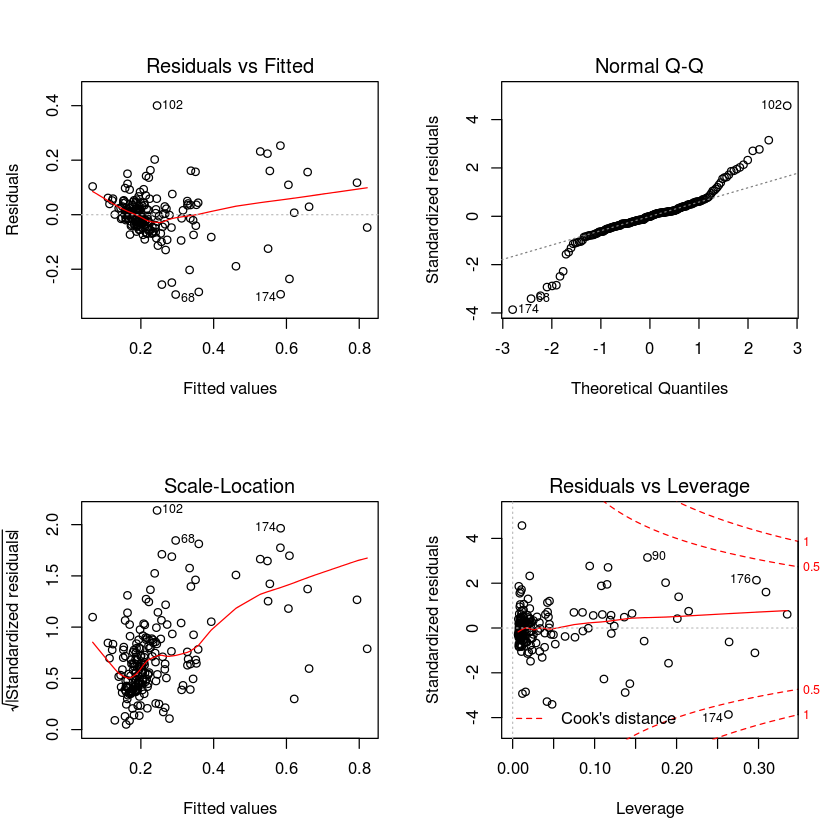

In [7]:
prod1.lm.fit = lm(V8 ~ .,data = prod1.data.train)
summary(prod1.lm.fit)
par(mfrow=c(2,2))
plot(prod1.lm.fit)

In [8]:
# Predict on test data set using regression model
prod1.lm.pred = predict(prod1.lm.fit,prod1.data.test[,1:7])
# Determine the mean absolute percentage error
prod1.lm.error=mean(100*abs(prod1.data.test[,8] - prod1.lm.pred)/ prod1.data.test[,8])
paste('Mean Absolute % Error for Regression Model : ',prod1.lm.error,'%')

[1] "Mean Absolute % Error for Regression Model :  32.1716881402131 %"

### SVM Model

In [9]:
library(e1071) # Load svm from library

In [10]:
#Build SVM Model
prod1.svm.fit = svm(prod1.data.train[,1:7],prod1.data.train[,8])
plot(prod1.svm.fit,prod1.data.train[,1:7],"V1 ~ V2")
# Predict using test data
prod1.svm.pred = predict(prod1.svm.fit,prod1.data.test[,1:7])
# Determine the mean absolute percentage error
prod1.svm.error=mean(100*abs(prod1.data.test[,8] - prod1.svm.pred)/prod1.data.test[,8])
paste('Mean Absolute % Error for SVM : ',prod1.svm.error,'%')

[1] "Mean Absolute % Error for SVM :  23.1444047252265 %"

### Neural Network

In [11]:
# Load Libraries
library(neuralnet) 
library(RSNNS)
library('devtools')
source_url('https://gist.githubusercontent.com/gggordon/809278dab6d7c6692f8b/raw/36cd22fa4dd7c719cecc6d30e006cdc07e2c0109/plot.nnet.r')

Loading required package: grid
Loading required package: MASS
Loading required package: Rcpp
SHA-1 hash of file is 74c80bd5ddbc17ab3ae5ece9c0ed9beb612e87ef


In [12]:
prod1.nn.1.fit = neuralnet(V8~V1+V2+V3+V4+V5+V6+V7,
                           data=prod1.data.train,
                           hidden=1,
                           learningrate=0.01,
                           #threshold=0.001,
                           #lifesign="full",
                           algorithm="backprop")
prod1.nn.1.pred = compute(prod1.nn.1.fit,prod1.data.test[,1:7])$net.result
prod1.nn.1.error=mean(100*abs(prod1.data.test[,8] - prod1.nn.1.pred)/prod1.data.test[,8])
paste('Mean Absolute % Error for Neural Network (1 hidden) : ',prod1.nn.1.error,'%')
#set.seed(23)
#plot.nnet(prod1.nn.4.fit,"Neural Network (4 Hidden)")

[1] "Mean Absolute % Error for Neural Network (1 hidden) :  39.558639745784 %"

In [13]:
prod1.nn.10.fit = neuralnet(V8~V1+V2+V3+V4+V5+V6+V7,
                           data=prod1.data.train,
                           hidden=10,
                           learningrate=0.001,
                           #threshold=0.001,
                           #lifesign="full",
                           algorithm="backprop")
prod1.nn.10.pred = compute(prod1.nn.10.fit,prod1.data.test[,1:7])$net.result
prod1.nn.10.error=mean(100*abs(prod1.data.test[,8] - prod1.nn.10.pred)/prod1.data.test[,8])
paste('Mean Absolute % Error for Neural Network (10 hidden) : ',prod1.nn.10.error,'%')

[1] "Mean Absolute % Error for Neural Network (10 hidden) :  31.6251097222069 %"

### Time Series Evaluation

#### More Data Preparation

In [14]:
# Retrieve the original time series data but concatenating the first row values with the last column values
prod1.data.raw=c(as.vector(t(prod1.data[1,1:7])[,1]),prod1.data[,8])

Time Series:
Start = c(1, 1) 
End = c(36, 6) 
Frequency = 7 
  [1]  354  306  282  261  264  220  195  241  284  275  232  326  173  224  196
 [16]  271  331  258  385  232  197  177  249  290  408   49  232  188  185  175
 [31]  232  163  186  210  224  226  318  334  252  263  259  483  293  597  103
 [46]  638  387  438  491  676  369  410  471  367  181  235  280  297  194  375
 [61]  188  203  220  289  322  228  293  200  196  243  354    2  232  345    4
 [76]  198  247  314  229  243  321  212  188  229  225  214  236  263  250  381
 [91]  367  376  292  253 1086  828 1134  969  901  969  576  238  208  279  316
[106]  221  228  313  874 1030 1104  937  852 1046  505  178  203  261  306  274
[121]  266  221  227  182  199  231  210  290  199  216  244  253  210  236  286
[136]  208  222  179  250  273  235  276  222  198  216  261  250  288  290  218
[151]  202  206  216  249  266  259  179  425  491  527  504  421  405  396  244
[166]  197  246  189  274  272  231  268  252  2

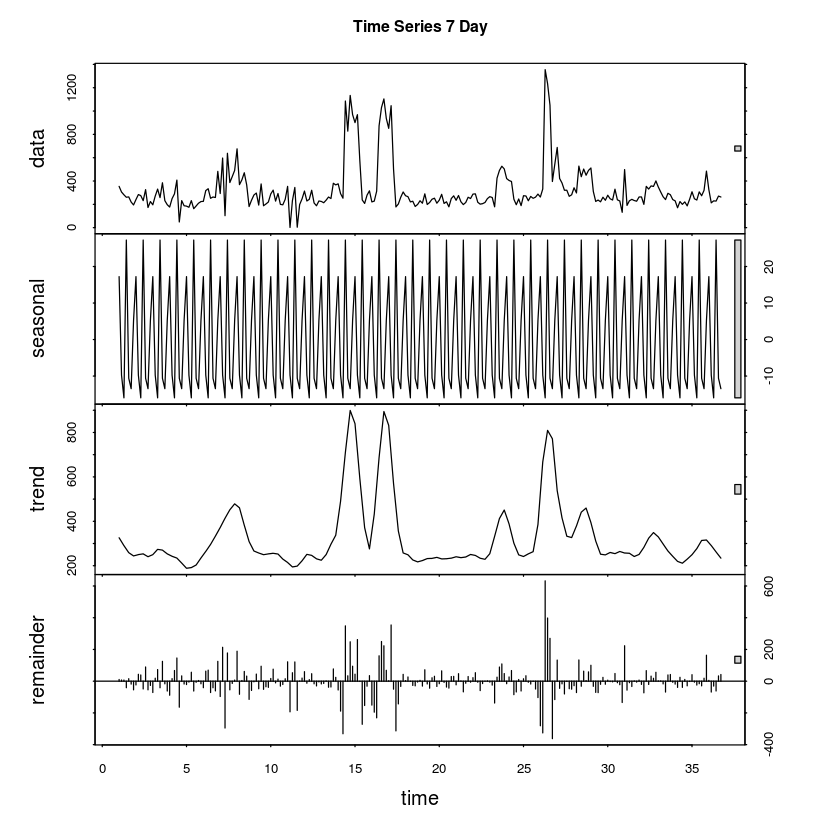

Time Series:
Start = c(1, 1) 
End = c(36, 6) 
Frequency = 7 
  [1] 5.8692969131 5.7235851020 5.6419070709 5.5645204073 5.5759491031
  [6] 5.3936275464 5.2729995586 5.4847969335 5.6489742382 5.6167710977
 [11] 5.4467373717 5.7868973814 5.1532915945 5.4116460519 5.2781146592
 [16] 5.6021188209 5.8021183754 5.5529595849 5.9532433343 5.4467373717
 [21] 5.2832037287 5.1761497326 5.5174528965 5.6698809230 6.0112671744
 [26] 3.8918202981 5.4467373717 5.2364419628 5.2203558251 5.1647859739
 [31] 5.4467373717 5.0937502008 5.2257466737 5.3471075307 5.4116460519
 [36] 5.4205349993 5.7620513828 5.8111409930 5.5294290875 5.5721540322
 [41] 5.5568280617 6.1800166537 5.6801726090 6.3919171134 4.6347289882
 [46] 6.4583382833 5.9584246930 6.0822189104 6.1964441278 6.5161930760
 [51] 5.9107966440 6.0161571597 6.1548580940 5.9053618481 5.1984970313
 [56] 5.4595855141 5.6347896032 5.6937321388 5.2678581591 5.9269260260
 [61] 5.2364419628 5.3132059790 5.3936275464 5.6664266881 5.7745515455
 [66] 5.42934562

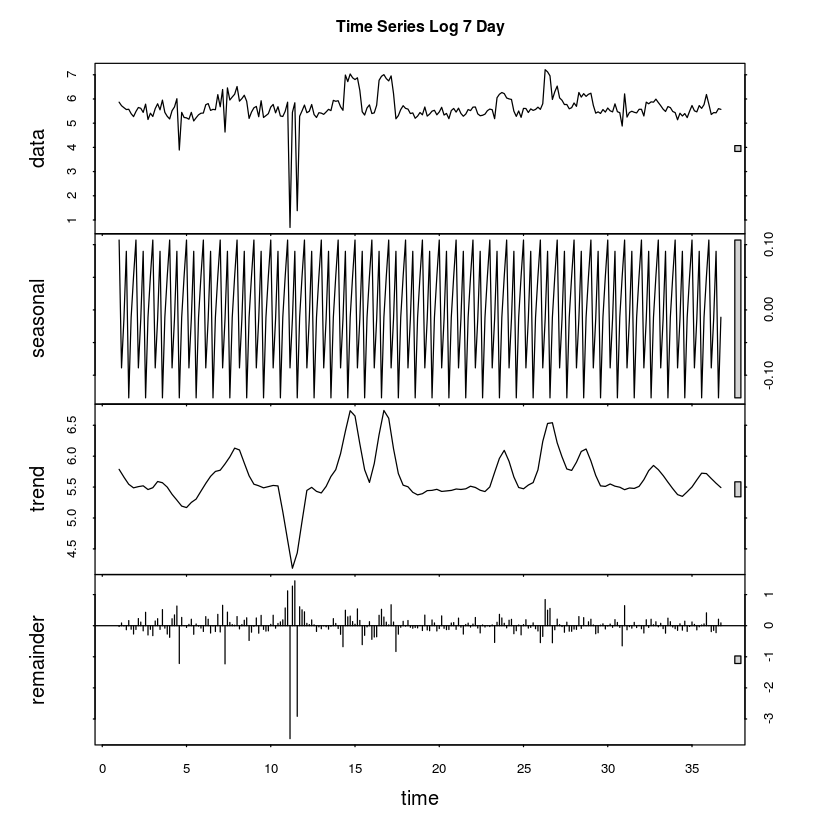

In [15]:
# Create time series from start of year for 7 day periods
prod1.data.rawts=ts(prod1.data.raw,start=1,freq=7)

plot(stl(prod1.data.rawts,s.window="periodic"),main="Time Series 7 Day")
prod1.data.rawts

prod1.data.rawts.log=log(prod1.data.rawts)
plot(stl(prod1.data.rawts.log,s.window="periodic"),main="Time Series Log 7 Day")
prod1.data.rawts.log



In [16]:
# Split time series data in test data (last 2 weeks/last 14 days) and train data to evaluate models
prod1.data.rawts.size = length(prod1.data.rawts)
prod1.data.rawts.trainBoundIndex = prod1.data.rawts.size-14
paste("Training Bound Index : ",prod1.data.rawts.trainBoundIndex)
prod1.data.rawts.train = ts(prod1.data.rawts[1:prod1.data.rawts.trainBoundIndex],start=1,freq=7)
                            
prod1.data.rawts.test = ts(prod1.data.rawts[(prod1.data.rawts.trainBoundIndex+1):prod1.data.rawts.size],
                           start=prod1.data.rawts.trainBoundIndex+1,freq=7)

paste("Train Size: ",length(prod1.data.rawts.train),
      "| Test size: ", length(prod1.data.rawts.test),
      " | Total:",prod1.data.rawts.size)


[1] "Training Bound Index :  237"

[1] "Train Size:  237 | Test size:  14  | Total: 251"

### Holt Winters

In [17]:
prod1.hw=HoltWinters(prod1.data.rawts.train,alpha=0.9,beta=0,gamma=0.9)
prod1.hw

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = prod1.data.rawts.train, alpha = 0.9, beta = 0,     gamma = 0.9)

Smoothing parameters:
 alpha: 0.9
 beta : 0
 gamma: 0.9

Coefficients:
             [,1]
a  201.1043636982
b   -1.7942176871
s1   0.3437327649
s2  35.7504366047
s3 -39.1395045042
s4  22.5990095175
s5  15.5784120290
s6  14.3192866818
s7 -14.0652564517

In [18]:
prod1.hw.rms=sqrt(sum((prod1.data.rawts.train-prod1.hw$fit[,1])^2))/length(prod1.data.rawts.train)
paste('Root Mean Square Error: ',prod1.hw.rms)

[1] "Root Mean Square Error:  10.5216229832783"

[1] "Mean Absolute % Error for Holt Winters :  29.2933187343579 %"

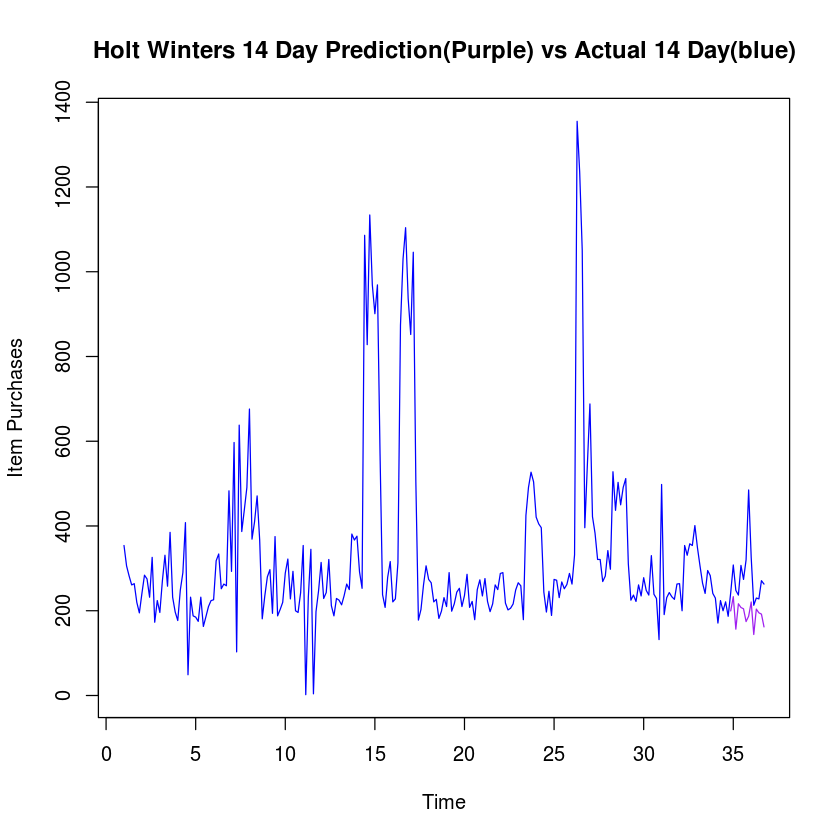

In [19]:
plot(prod1.data.rawts,col="blue",
     main="Holt Winters 14 Day Prediction(Purple) vs Actual 14 Day(blue)",
     ylab="Item Purchases")
prod1.hw.pred = predict(prod1.hw,n.ahead=14)
lines(prod1.hw.pred,col=c('purple'))
testv = as.vector(prod1.data.rawts.test)
predv = as.vector(prod1.hw.pred[,1])
prod1.hw.error=mean(100*abs(testv - predv)/testv)
paste('Mean Absolute % Error for Holt Winters : ',prod1.hw.error,'%')

### Arima

In [20]:
library(forecast)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate

Attaching package: ‘timeDate’

The following objects are masked from ‘package:e1071’:

    kurtosis, skewness

This is forecast 6.2 



In [21]:
# Use AIC as model evaluation test to test ARIMA models and choose best
# Initally Assumed (7,0,0)
prod1.arima.fit=auto.arima(prod1.data.rawts.train, ic = "aic")
prod1.arima.fit

Series: prod1.data.rawts.train 
ARIMA(1,0,2) with non-zero mean 

Coefficients:
            ar1         ma1        ma2    intercept
      0.6994472  -0.0527762  0.1071911  328.2475969
s.e.  0.0861319   0.1106906  0.0745479   33.0980019

sigma^2 estimated as 21532.35:  log likelihood=-1518.96
AIC=3047.93   AICc=3048.19   BIC=3065.27

Time Series:
Start = c(34, 7) 
End = c(36, 6) 
Frequency = 7 
 [1] 239.8176364 269.1640891 294.7152205 309.4190544 323.3211432 339.6968876
 [7] 344.0690620 346.1806211 344.5656868 343.6299803 340.9306083 337.3220957
[13] 334.2325867 331.7240075

[1] "Mean Absolute % Error for Holt Winters :  24.3868519387838 %"

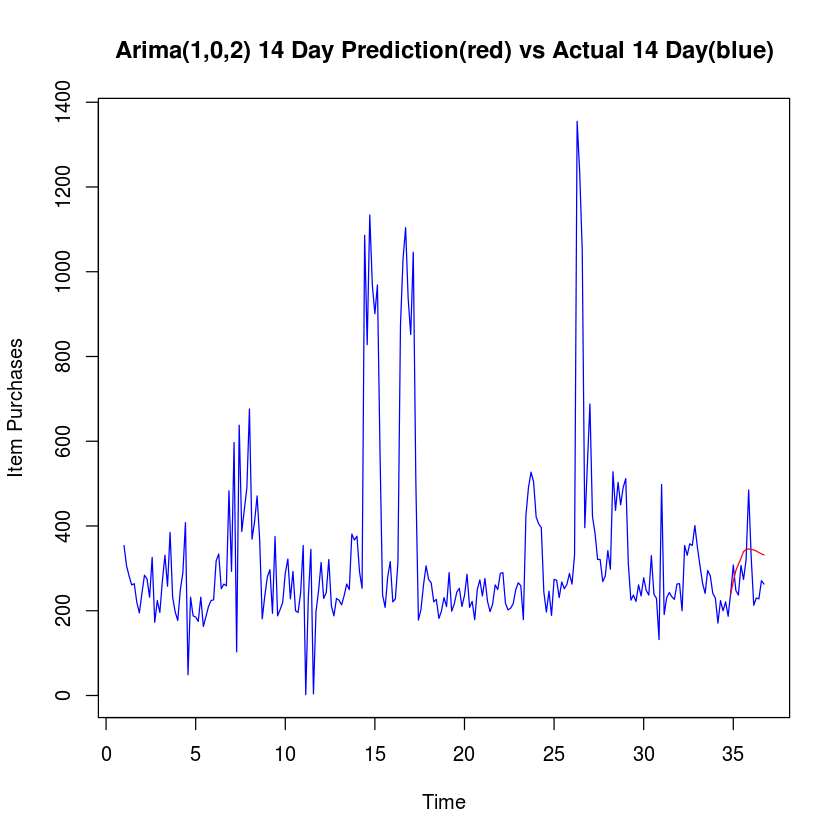

In [24]:
plot(prod1.data.rawts,col="blue",
     main="Arima(1,0,2) 14 Day Prediction(red) vs Actual 14 Day(blue)",
     ylab="Item Purchases")
prod1.arima.pred= predict(prod1.arima,n.ahead=14)$pred
prod1.arima.pred
lines(prod1.arima.pred,col=c('red'))
testv = as.vector(prod1.data.rawts.test)

predv = as.vector(prod1.arima.pred)
prod1.arima.error=mean(100*abs(testv - predv)/testv)
paste('Mean Absolute % Error for Holt Winters : ',prod1.arima.error,'%')


Call:
arima(x = prod1.data.rawts.train, order = c(7, 0, 0))

Coefficients:
           ar1        ar2         ar3        ar4         ar5         ar6
      0.637744  0.1694702  -0.1282548  0.1321486  -0.0270686  -0.1534491
s.e.  0.064692  0.0760803   0.0768969  0.0766079   0.0765255   0.0755916
            ar7    intercept
      0.0299667  329.5289812
s.e.  0.0641740   27.4571695

sigma^2 estimated as 20714.09:  log likelihood = -1514.47,  aic = 3046.95

Time Series:
Start = c(34, 7) 
End = c(36, 6) 
Frequency = 7 
 [1] 239.8176364 269.1640891 294.7152205 309.4190544 323.3211432 339.6968876
 [7] 344.0690620 346.1806211 344.5656868 343.6299803 340.9306083 337.3220957
[13] 334.2325867 331.7240075

[1] "Mean Absolute % Error for Holt Winters :  24.3868519387838 %"

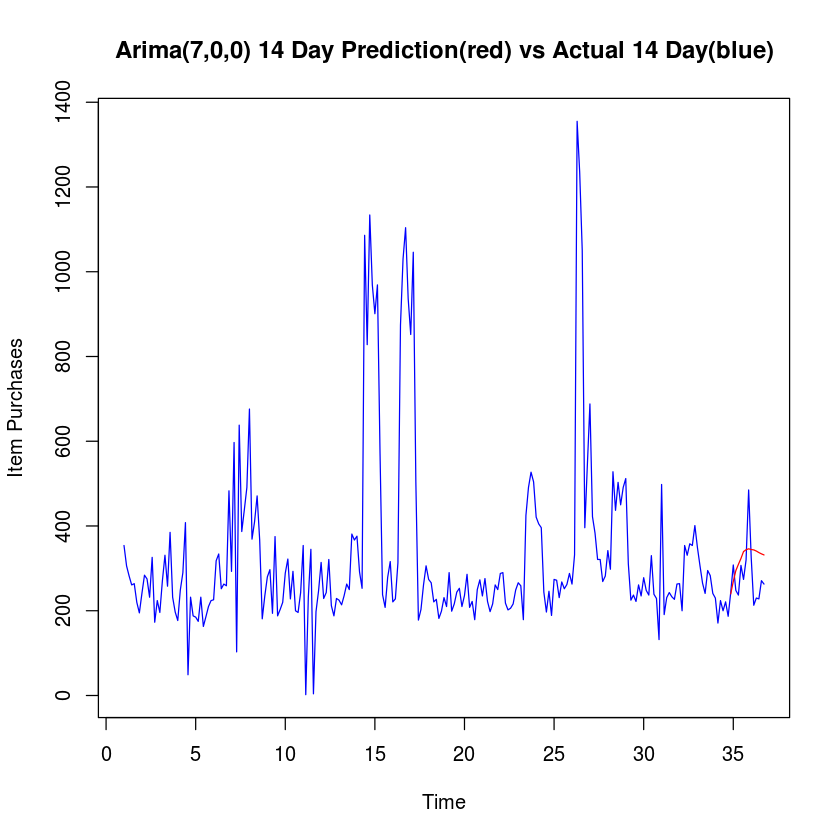

In [25]:
prod1.arima=arima(prod1.data.rawts.train,order=c(7,0,0))
prod1.arima


plot(prod1.data.rawts,col="blue",
     main="Arima(7,0,0) 14 Day Prediction(red) vs Actual 14 Day(blue)",
     ylab="Item Purchases")
prod1.arima.pred= predict(prod1.arima,n.ahead=14)$pred
prod1.arima.pred
lines(prod1.arima.pred,col=c('red'))
testv = as.vector(prod1.data.rawts.test)

predv = as.vector(prod1.arima.pred)
prod1.arima.error=mean(100*abs(testv - predv)/testv)
paste('Mean Absolute % Error for Holt Winters : ',prod1.arima.error,'%')